In [1]:
!pip install uproot awkward lz4 xxhash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.0/347.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 742.2/742.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 14.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import uproot
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [4]:
up = uproot.open ("/content/drive/MyDrive/B2HHH_MagnetUp.root: DecayTree")

down = uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown4.root: DecayTree")

# B -> KPiPi down decay

In [5]:
#Retrieving the 3-space momentum of each daughter particle
Px_H1 = down["H1_PX"].array(library="np")
Py_H1 = down["H1_PY"].array(library="np")
Pz_H1 = down["H1_PZ"].array(library="np")
print(len(Px_H1))

Ptot_H1_Down = sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)
print(len(Ptot_H1_Down))

Px_H2 = down["H2_PX"].array(library="np")
Py_H2 = down["H2_PY"].array(library="np")
Pz_H2 = down["H2_PZ"].array(library="np")

Ptot_H2_Down = sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)

Px_H3 = down["H3_PX"].array(library="np")
Py_H3 = down["H3_PY"].array(library="np")
Pz_H3 = down["H3_PZ"].array(library="np")

Ptot_H3_Down = sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)


#Constructing the total momentum of the B meson
M_Ptot = sqrt((Px_H1 + Py_H1 + Pz_H1)**2 + (Px_H2 + Py_H2 + Pz_H2)**2 + (Px_H3 + Py_H3 + Pz_H3)**2)


5135823
5135823


In [6]:
#Constructing the total momentum of the B meson
M_Ptot = sqrt((Px_H1 + Py_H1 + Pz_H1)**2 + (Px_H2 + Py_H2 + Pz_H2)**2 + (Px_H3 + Py_H3 + Pz_H3)**2)

#Mass of a Kaon in MeV/c^2
mass_K = 493.677
#Mass of Pion in MeV/c^2
mass_pi = 135

#Constructing the mass of each daughter particle in the B->Kpipi decay
E_H1TOT = sqrt(mass_pi**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2TOT = sqrt(mass_pi**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3TOT = sqrt(mass_K**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total mass of the B meson
E_TOT = E_H1TOT + E_H2TOT + E_H3TOT

#Constructing the total momentum of the B meson
P_TOT = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother = sqrt(E_TOT**2 - P_TOT**2)

#Total energy for the B->KKpi decay
E_TOT2 = E_H1TOT + E_H1TOT + E_H3TOT

#Total momentum for the B->KKpi decay
P_TOT2 = sqrt((Px_H1 + Px_H1 + Px_H3)**2 + (Py_H1 + Py_H1 + Py_H3)**2 + (Pz_H1 + Pz_H1 + Pz_H3)**2)

#New mass of B meson for B->KKpi decay
mass_mother2 = sqrt(E_TOT2**2 - P_TOT2**2)

In [7]:
#Separating the full data into B+ and B-
Full_Tree_minusKPP = down.arrays(cut="(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Full_Tree_plusKPP = down.arrays(cut="(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Down_Full_minusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKPP["H1_PX"]**2 + Full_Tree_minusKPP["H1_PY"]**2 + Full_Tree_minusKPP["H1_PZ"]**2)**2)
E_H2TOT_Down_Full_minusKPP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKPP["H2_PX"]**2 + Full_Tree_minusKPP["H2_PY"]**2 + Full_Tree_minusKPP["H2_PZ"]**2)**2)
E_H3TOT_Down_Full_minusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKPP["H3_PX"]**2 + Full_Tree_minusKPP["H3_PY"]**2 + Full_Tree_minusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_minusKPP = E_H1TOT_Down_Full_minusKPP + E_H2TOT_Down_Full_minusKPP + E_H3TOT_Down_Full_minusKPP

#Assigning the total cut momentum into a variable
P_TOTFull_minusKPP = sqrt((Full_Tree_minusKPP["H1_PX"] + Full_Tree_minusKPP["H2_PX"] + Full_Tree_minusKPP["H3_PX"])**2 + (Full_Tree_minusKPP["H1_PY"] + Full_Tree_minusKPP["H2_PY"] + Full_Tree_minusKPP["H3_PY"])**2 + (Full_Tree_minusKPP["H1_PZ"] + Full_Tree_minusKPP["H2_PZ"] + Full_Tree_minusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Full_minusKPP = sqrt(E_TOT_Full_minusKPP**2 - P_TOTFull_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Down_Full_plusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKPP["H1_PX"]**2 + Full_Tree_plusKPP["H1_PY"]**2 + Full_Tree_plusKPP["H1_PZ"]**2)**2)
E_H2TOT_Down_Full_plusKPP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKPP["H2_PX"]**2 + Full_Tree_plusKPP["H2_PY"]**2 + Full_Tree_plusKPP["H2_PZ"]**2)**2)
E_H3TOT_Down_Full_plusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKPP["H3_PX"]**2 + Full_Tree_plusKPP["H3_PY"]**2 + Full_Tree_plusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_plusKPP = E_H1TOT_Down_Full_plusKPP + E_H2TOT_Down_Full_plusKPP + E_H3TOT_Down_Full_plusKPP

#Assigning the total cut momentum into a variable
P_TOTFull_plusKPP = sqrt((Full_Tree_plusKPP["H1_PX"] + Full_Tree_plusKPP["H2_PX"] + Full_Tree_plusKPP["H3_PX"])**2 + (Full_Tree_plusKPP["H1_PY"] + Full_Tree_plusKPP["H2_PY"] + Full_Tree_plusKPP["H3_PY"])**2 + (Full_Tree_plusKPP["H1_PZ"] + Full_Tree_plusKPP["H2_PZ"] + Full_Tree_plusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Full_plusKPP = sqrt(E_TOT_Full_plusKPP**2 - P_TOTFull_plusKPP**2)

In [8]:
#So I'm separating the data into B+ and B- data according to the analysis from the previous block
Tree_Cut_minusKPP = down.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKPP = down.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Down_Cut_minusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKPP["H1_PX"]**2 + Tree_Cut_minusKPP["H1_PY"]**2 + Tree_Cut_minusKPP["H1_PZ"]**2)**2)
E_H2TOT_Down_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H2_PX"]**2 + Tree_Cut_minusKPP["H2_PY"]**2 + Tree_Cut_minusKPP["H2_PZ"]**2)**2)
E_H3TOT_Down_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H3_PX"]**2 + Tree_Cut_minusKPP["H3_PY"]**2 + Tree_Cut_minusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKPP = E_H1TOT_Down_Cut_minusKPP + E_H2TOT_Down_Cut_minusKPP + E_H3TOT_Down_Cut_minusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_minusKPP = sqrt((Tree_Cut_minusKPP["H1_PX"] + Tree_Cut_minusKPP["H2_PX"] + Tree_Cut_minusKPP["H3_PX"])**2 + (Tree_Cut_minusKPP["H1_PY"] + Tree_Cut_minusKPP["H2_PY"] + Tree_Cut_minusKPP["H3_PY"])**2 + (Tree_Cut_minusKPP["H1_PZ"] + Tree_Cut_minusKPP["H2_PZ"] + Tree_Cut_minusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Cut_minusKPP = sqrt(E_TOT_Cut_minusKPP**2 - P_TOTCUT_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Down_Cut_plusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKPP["H1_PX"]**2 + Tree_Cut_plusKPP["H1_PY"]**2 + Tree_Cut_plusKPP["H1_PZ"]**2)**2)
E_H2TOT_Down_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H2_PX"]**2 + Tree_Cut_plusKPP["H2_PY"]**2 + Tree_Cut_plusKPP["H2_PZ"]**2)**2)
E_H3TOT_Down_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H3_PX"]**2 + Tree_Cut_plusKPP["H3_PY"]**2 + Tree_Cut_plusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKPP = E_H1TOT_Down_Cut_plusKPP + E_H2TOT_Down_Cut_plusKPP + E_H3TOT_Down_Cut_plusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_plusKPP = sqrt((Tree_Cut_plusKPP["H1_PX"] + Tree_Cut_plusKPP["H2_PX"] + Tree_Cut_plusKPP["H3_PX"])**2 + (Tree_Cut_plusKPP["H1_PY"] + Tree_Cut_plusKPP["H2_PY"] + Tree_Cut_plusKPP["H3_PY"])**2 + (Tree_Cut_plusKPP["H1_PZ"] + Tree_Cut_plusKPP["H2_PZ"] + Tree_Cut_plusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Cut_plusKPP = sqrt(E_TOT_Cut_plusKPP**2 - P_TOTCUT_plusKPP**2)

In [9]:
print(len(mass_mother_Down_Cut_minusKPP))
print(len(mass_mother_Down_Cut_plusKPP))
Events_KPPplus = len(mass_mother_Down_Cut_plusKPP)
Events_KPPminus = len(mass_mother_Down_Cut_minusKPP)

print("Number of B+ ->Kpipi events is: " + str(Events_KPPplus))
print("Number of B- ->Kpipi events is: " + str(Events_KPPminus))

401541
421072
Number of B+ ->Kpipi events is: 421072
Number of B- ->Kpipi events is: 401541


# B -> KKPi down decay

In [10]:
#Moving on to separating data of the B->KKpi decay


#Constructing the mass of each daughter particle in the B->KKpi decay
E_H1_TOT = sqrt(mass_K**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2_TOT = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3_TOT = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total mass of the B meson
E_TOT_ = E_H1_TOT + E_H2_TOT + E_H3_TOT

#Constructing the total momentum of the B meson
P_TOT_ = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother_KKpi = sqrt(E_TOT_**2 - P_TOT**2)

In [11]:
#Separating B+ and B-
Full_Tree_minusKKP = down.arrays(cut="(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Full_Tree_plusKKP = down.arrays(cut="(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data of the B- -> KKpi decay
E_H1TOT_Down_Full_minusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKKP["H1_PX"]**2 + Full_Tree_minusKKP["H1_PY"]**2 + Full_Tree_minusKKP["H1_PZ"]**2)**2)
E_H2TOT_Down_Full_minusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKKP["H2_PX"]**2 + Full_Tree_minusKKP["H2_PY"]**2 + Full_Tree_minusKKP["H2_PZ"]**2)**2)
E_H3TOT_Down_Full_minusKKP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKKP["H3_PX"]**2 + Full_Tree_minusKKP["H3_PY"]**2 + Full_Tree_minusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_minusKKP = E_H1TOT_Down_Full_minusKKP + E_H2TOT_Down_Full_minusKKP + E_H3TOT_Down_Full_minusKKP

#Assigning the total cut momentum into a variable
P_TOTFull_minusKKP = sqrt((Full_Tree_minusKKP["H1_PX"] + Full_Tree_minusKKP["H2_PX"] + Full_Tree_minusKKP["H3_PX"])**2 + (Full_Tree_minusKKP["H1_PY"] + Full_Tree_minusKKP["H2_PY"] + Full_Tree_minusKKP["H3_PY"])**2 + (Full_Tree_minusKKP["H1_PZ"] + Full_Tree_minusKKP["H2_PZ"] + Full_Tree_minusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Full_minusKKP = sqrt(E_TOT_Full_minusKKP**2 - P_TOTFull_minusKKP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data of the B+ -> KKpi decay
E_H1TOT_Down_Full_plusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKKP["H1_PX"]**2 + Full_Tree_plusKKP["H1_PY"]**2 + Full_Tree_plusKKP["H1_PZ"]**2)**2)
E_H2TOT_Down_Full_plusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKKP["H2_PX"]**2 + Full_Tree_plusKKP["H2_PY"]**2 + Full_Tree_plusKKP["H2_PZ"]**2)**2)
E_H3TOT_Down_Full_plusKKP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKKP["H3_PX"]**2 + Full_Tree_plusKKP["H3_PY"]**2 + Full_Tree_plusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_plusKKP = E_H1TOT_Down_Full_plusKKP + E_H2TOT_Down_Full_plusKKP + E_H3TOT_Down_Full_plusKKP

#Assigning the total cut momentum into a variable
P_TOTFull_plusKKP = sqrt((Full_Tree_plusKKP["H1_PX"] + Full_Tree_plusKKP["H2_PX"] + Full_Tree_plusKKP["H3_PX"])**2 + (Full_Tree_plusKKP["H1_PY"] + Full_Tree_plusKKP["H2_PY"] + Full_Tree_plusKKP["H3_PY"])**2 + (Full_Tree_plusKKP["H1_PZ"] + Full_Tree_plusKKP["H2_PZ"] + Full_Tree_plusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Full_plusKKP = sqrt(E_TOT_Full_plusKKP**2 - P_TOTFull_plusKKP**2)

In [12]:
#Again for the B->KKpi

#So I'm separating the data into B+ and B- data according to the analysis from the previous block
Tree_Cut_minusKKP = down.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKKP = down.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Down_Cut_minusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKKP["H1_PX"]**2 + Tree_Cut_minusKKP["H1_PY"]**2 + Tree_Cut_minusKKP["H1_PZ"]**2)**2)
E_H2TOT_Down_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H2_PX"]**2 + Tree_Cut_minusKKP["H2_PY"]**2 + Tree_Cut_minusKKP["H2_PZ"]**2)**2)
E_H3TOT_Down_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H3_PX"]**2 + Tree_Cut_minusKKP["H3_PY"]**2 + Tree_Cut_minusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKKP = E_H1TOT_Down_Cut_minusKKP + E_H2TOT_Down_Cut_minusKKP + E_H3TOT_Down_Cut_minusKKP

#Assigning the total cut momentum into a variable
P_TOTCUT_minusKKP = sqrt((Tree_Cut_minusKKP["H1_PX"] + Tree_Cut_minusKKP["H2_PX"] + Tree_Cut_minusKKP["H3_PX"])**2 + (Tree_Cut_minusKKP["H1_PY"] + Tree_Cut_minusKKP["H2_PY"] + Tree_Cut_minusKKP["H3_PY"])**2 + (Tree_Cut_minusKKP["H1_PZ"] + Tree_Cut_minusKKP["H2_PZ"] + Tree_Cut_minusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Cut_minusKKP = sqrt(E_TOT_Cut_minusKKP**2 - P_TOTCUT_minusKKP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Down_Cut_plusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKKP["H1_PX"]**2 + Tree_Cut_plusKKP["H1_PY"]**2 + Tree_Cut_plusKKP["H1_PZ"]**2)**2)
E_H2TOT_Down_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H2_PX"]**2 + Tree_Cut_plusKKP["H2_PY"]**2 + Tree_Cut_plusKKP["H2_PZ"]**2)**2)
E_H3TOT_Down_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H3_PX"]**2 + Tree_Cut_plusKKP["H3_PY"]**2 + Tree_Cut_plusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKKP = E_H1TOT_Down_Cut_plusKKP + E_H2TOT_Down_Cut_plusKKP + E_H3TOT_Down_Cut_plusKKP

#Assigning the total cut momentum into a variable
P_TOTCUT_plusKKP = sqrt((Tree_Cut_plusKKP["H1_PX"] + Tree_Cut_plusKKP["H2_PX"] + Tree_Cut_plusKKP["H3_PX"])**2 + (Tree_Cut_plusKKP["H1_PY"] + Tree_Cut_plusKKP["H2_PY"] + Tree_Cut_plusKKP["H3_PY"])**2 + (Tree_Cut_plusKKP["H1_PZ"] + Tree_Cut_plusKKP["H2_PZ"] + Tree_Cut_plusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Down_Cut_plusKKP = sqrt(E_TOT_Cut_plusKKP**2 - P_TOTCUT_plusKKP**2)

In [13]:
print(len(mass_mother_Down_Cut_minusKKP))
print(len(mass_mother_Down_Cut_plusKKP))
Events_KKPplus = len(mass_mother_Down_Cut_plusKKP)
Events_KKPminus = len(mass_mother_Down_Cut_minusKKP)

print("Number of B+ ->Kpipi events is: " + str(Events_KKPplus))
print("Number of B- ->Kpipi events is: " + str(Events_KKPminus))

138119
144097
Number of B+ ->Kpipi events is: 144097
Number of B- ->Kpipi events is: 138119


# B -> KPiPi up decay

In [57]:
#Retrieving the 3-space momentum of each daughter particle
Px_H1 = up["H1_PX"].array(library="np")
Py_H1 = up["H1_PY"].array(library="np")
Pz_H1 = up["H1_PZ"].array(library="np")

Ptot_H1_Up = sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)

Px_H2 = up["H2_PX"].array(library="np")
Py_H2 = up["H2_PY"].array(library="np")
Pz_H2 = up["H2_PZ"].array(library="np")

Ptot_H2_Up = sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)

Px_H3 = up["H3_PX"].array(library="np")
Py_H3 = up["H3_PY"].array(library="np")
Pz_H3 = up["H3_PZ"].array(library="np")

Ptot_H3_Up = sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)


#Constructing the total momentum of the B meson
M_Ptot = sqrt((Px_H1 + Py_H1 + Pz_H1)**2 + (Px_H2 + Py_H2 + Pz_H2)**2 + (Px_H3 + Py_H3 + Pz_H3)**2)


In [58]:
#Constructing the total momentum of the B meson
M_Ptot = sqrt((Px_H1 + Py_H1 + Pz_H1)**2 + (Px_H2 + Py_H2 + Pz_H2)**2 + (Px_H3 + Py_H3 + Pz_H3)**2)

#Mass of a Kaon in MeV/c^2
mass_K = 493.677
#Mass of Pion in MeV/c^2
mass_pi = 135

#Constructing the mass of each daughter particle in the B->Kpipi decay
E_H1TOT = sqrt(mass_pi**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2TOT = sqrt(mass_pi**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3TOT = sqrt(mass_K**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total mass of the B meson
E_TOT = E_H1TOT + E_H2TOT + E_H3TOT

#Constructing the total momentum of the B meson
P_TOT = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother = sqrt(E_TOT**2 - P_TOT**2)

#Total energy for the B->KKpi decay
E_TOT2 = E_H1TOT + E_H1TOT + E_H3TOT

#Total momentum for the B->KKpi decay
P_TOT2 = sqrt((Px_H1 + Px_H1 + Px_H3)**2 + (Py_H1 + Py_H1 + Py_H3)**2 + (Pz_H1 + Pz_H1 + Pz_H3)**2)

#New mass of B meson for B->KKpi decay
mass_mother2 = sqrt(E_TOT2**2 - P_TOT2**2)

In [59]:
#Separating the full data into B+ and B-
Full_Tree_minusKPP = up.arrays(cut="(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Full_Tree_plusKPP = up.arrays(cut="(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Up_Full_minusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKPP["H1_PX"]**2 + Full_Tree_minusKPP["H1_PY"]**2 + Full_Tree_minusKPP["H1_PZ"]**2)**2)
E_H2TOT_Up_Full_minusKPP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKPP["H2_PX"]**2 + Full_Tree_minusKPP["H2_PY"]**2 + Full_Tree_minusKPP["H2_PZ"]**2)**2)
E_H3TOT_Up_Full_minusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKPP["H3_PX"]**2 + Full_Tree_minusKPP["H3_PY"]**2 + Full_Tree_minusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_minusKPP = E_H1TOT_Up_Full_minusKPP + E_H2TOT_Up_Full_minusKPP + E_H3TOT_Up_Full_minusKPP

#Assigning the total cut momentum into a variable
P_TOTFull_minusKPP = sqrt((Full_Tree_minusKPP["H1_PX"] + Full_Tree_minusKPP["H2_PX"] + Full_Tree_minusKPP["H3_PX"])**2 + (Full_Tree_minusKPP["H1_PY"] + Full_Tree_minusKPP["H2_PY"] + Full_Tree_minusKPP["H3_PY"])**2 + (Full_Tree_minusKPP["H1_PZ"] + Full_Tree_minusKPP["H2_PZ"] + Full_Tree_minusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Full_minusKPP = sqrt(E_TOT_Full_minusKPP**2 - P_TOTFull_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Up_Full_plusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKPP["H1_PX"]**2 + Full_Tree_plusKPP["H1_PY"]**2 + Full_Tree_plusKPP["H1_PZ"]**2)**2)
E_H2TOT_Up_Full_plusKPP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKPP["H2_PX"]**2 + Full_Tree_plusKPP["H2_PY"]**2 + Full_Tree_plusKPP["H2_PZ"]**2)**2)
E_H3TOT_Up_Full_plusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKPP["H3_PX"]**2 + Full_Tree_plusKPP["H3_PY"]**2 + Full_Tree_plusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_plusKPP = E_H1TOT_Up_Full_plusKPP + E_H2TOT_Up_Full_plusKPP + E_H3TOT_Up_Full_plusKPP

#Assigning the total cut momentum into a variable
P_TOTFull_plusKPP = sqrt((Full_Tree_plusKPP["H1_PX"] + Full_Tree_plusKPP["H2_PX"] + Full_Tree_plusKPP["H3_PX"])**2 + (Full_Tree_plusKPP["H1_PY"] + Full_Tree_plusKPP["H2_PY"] + Full_Tree_plusKPP["H3_PY"])**2 + (Full_Tree_plusKPP["H1_PZ"] + Full_Tree_plusKPP["H2_PZ"] + Full_Tree_plusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Full_plusKPP = sqrt(E_TOT_Full_plusKPP**2 - P_TOTFull_plusKPP**2)

In [60]:
#So I'm separating the data into B+ and B- data according to the analysis from the previous block
Tree_Cut_minusKPP = up.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKPP = up.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Up_Cut_minusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKPP["H1_PX"]**2 + Tree_Cut_minusKPP["H1_PY"]**2 + Tree_Cut_minusKPP["H1_PZ"]**2)**2)
E_H2TOT_Up_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H2_PX"]**2 + Tree_Cut_minusKPP["H2_PY"]**2 + Tree_Cut_minusKPP["H2_PZ"]**2)**2)
E_H3TOT_Up_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H3_PX"]**2 + Tree_Cut_minusKPP["H3_PY"]**2 + Tree_Cut_minusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKPP = E_H1TOT_Up_Cut_minusKPP + E_H2TOT_Up_Cut_minusKPP + E_H3TOT_Up_Cut_minusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_minusKPP = sqrt((Tree_Cut_minusKPP["H1_PX"] + Tree_Cut_minusKPP["H2_PX"] + Tree_Cut_minusKPP["H3_PX"])**2 + (Tree_Cut_minusKPP["H1_PY"] + Tree_Cut_minusKPP["H2_PY"] + Tree_Cut_minusKPP["H3_PY"])**2 + (Tree_Cut_minusKPP["H1_PZ"] + Tree_Cut_minusKPP["H2_PZ"] + Tree_Cut_minusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Cut_minusKPP = sqrt(E_TOT_Cut_minusKPP**2 - P_TOTCUT_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Up_Cut_plusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKPP["H1_PX"]**2 + Tree_Cut_plusKPP["H1_PY"]**2 + Tree_Cut_plusKPP["H1_PZ"]**2)**2)
E_H2TOT_Up_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H2_PX"]**2 + Tree_Cut_plusKPP["H2_PY"]**2 + Tree_Cut_plusKPP["H2_PZ"]**2)**2)
E_H3TOT_Up_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H3_PX"]**2 + Tree_Cut_plusKPP["H3_PY"]**2 + Tree_Cut_plusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKPP = E_H1TOT_Up_Cut_plusKPP + E_H2TOT_Up_Cut_plusKPP + E_H3TOT_Up_Cut_plusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_plusKPP = sqrt((Tree_Cut_plusKPP["H1_PX"] + Tree_Cut_plusKPP["H2_PX"] + Tree_Cut_plusKPP["H3_PX"])**2 + (Tree_Cut_plusKPP["H1_PY"] + Tree_Cut_plusKPP["H2_PY"] + Tree_Cut_plusKPP["H3_PY"])**2 + (Tree_Cut_plusKPP["H1_PZ"] + Tree_Cut_plusKPP["H2_PZ"] + Tree_Cut_plusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Cut_plusKPP = sqrt(E_TOT_Cut_plusKPP**2 - P_TOTCUT_plusKPP**2)

In [61]:
print(len(mass_mother_Up_Cut_minusKPP))
print(len(mass_mother_Up_Cut_plusKPP))
Events_KPPplus = len(mass_mother_Up_Cut_plusKPP)
Events_KPPminus = len(mass_mother_Up_Cut_minusKPP)

print("Number of B+ ->Kpipi events is: " + str(Events_KPPplus))
print("Number of B- ->Kpipi events is: " + str(Events_KPPminus))

265635
283143
Number of B+ ->Kpipi events is: 283143
Number of B- ->Kpipi events is: 265635


# B -> KKPi up decay

In [62]:
#Moving on to separating data of the B->KKpi decay


#Constructing the mass of each daughter particle in the B->KKpi decay
E_H1_TOT = sqrt(mass_K**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2_TOT = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3_TOT = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total mass of the B meson
E_TOT_ = E_H1_TOT + E_H2_TOT + E_H3_TOT

#Constructing the total momentum of the B meson
P_TOT_ = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother_KKpi = sqrt(E_TOT_**2 - P_TOT**2)

In [63]:
#Separating B+ and B-
Full_Tree_minusKKP = up.arrays(cut="(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Full_Tree_plusKKP = up.arrays(cut="(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data of the B- -> KKpi decay
E_H1TOT_Up_Full_minusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKKP["H1_PX"]**2 + Full_Tree_minusKKP["H1_PY"]**2 + Full_Tree_minusKKP["H1_PZ"]**2)**2)
E_H2TOT_Up_Full_minusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKKP["H2_PX"]**2 + Full_Tree_minusKKP["H2_PY"]**2 + Full_Tree_minusKKP["H2_PZ"]**2)**2)
E_H3TOT_Up_Full_minusKKP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKKP["H3_PX"]**2 + Full_Tree_minusKKP["H3_PY"]**2 + Full_Tree_minusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_minusKKP = E_H1TOT_Up_Full_minusKKP + E_H2TOT_Up_Full_minusKKP + E_H3TOT_Up_Full_minusKKP

#Assigning the total cut momentum into a variable
P_TOTFull_minusKKP = sqrt((Full_Tree_minusKKP["H1_PX"] + Full_Tree_minusKKP["H2_PX"] + Full_Tree_minusKKP["H3_PX"])**2 + (Full_Tree_minusKKP["H1_PY"] + Full_Tree_minusKKP["H2_PY"] + Full_Tree_minusKKP["H3_PY"])**2 + (Full_Tree_minusKKP["H1_PZ"] + Full_Tree_minusKKP["H2_PZ"] + Full_Tree_minusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Full_minusKKP = sqrt(E_TOT_Full_minusKKP**2 - P_TOTFull_minusKKP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data of the B+ -> KKpi decay
E_H1TOT_Up_Full_plusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKKP["H1_PX"]**2 + Full_Tree_plusKKP["H1_PY"]**2 + Full_Tree_plusKKP["H1_PZ"]**2)**2)
E_H2TOT_Up_Full_plusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKKP["H2_PX"]**2 + Full_Tree_plusKKP["H2_PY"]**2 + Full_Tree_plusKKP["H2_PZ"]**2)**2)
E_H3TOT_Up_Full_plusKKP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKKP["H3_PX"]**2 + Full_Tree_plusKKP["H3_PY"]**2 + Full_Tree_plusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_plusKKP = E_H1TOT_Up_Full_plusKKP + E_H2TOT_Up_Full_plusKKP + E_H3TOT_Up_Full_plusKKP

#Assigning the total cut momentum into a variable
P_TOTFull_plusKKP = sqrt((Full_Tree_plusKKP["H1_PX"] + Full_Tree_plusKKP["H2_PX"] + Full_Tree_plusKKP["H3_PX"])**2 + (Full_Tree_plusKKP["H1_PY"] + Full_Tree_plusKKP["H2_PY"] + Full_Tree_plusKKP["H3_PY"])**2 + (Full_Tree_plusKKP["H1_PZ"] + Full_Tree_plusKKP["H2_PZ"] + Full_Tree_plusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Full_plusKKP = sqrt(E_TOT_Full_plusKKP**2 - P_TOTFull_plusKKP**2)

In [64]:
# Again for the B->KKpi

# So I'm separating the data into B+ and B- data according to the analysis from the previous block
Tree_Cut_minusKKP = up.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKKP = up.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

# Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Up_Cut_minusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKKP["H1_PX"]**2 + Tree_Cut_minusKKP["H1_PY"]**2 + Tree_Cut_minusKKP["H1_PZ"]**2)**2)
E_H2TOT_Up_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H2_PX"]**2 + Tree_Cut_minusKKP["H2_PY"]**2 + Tree_Cut_minusKKP["H2_PZ"]**2)**2)
E_H3TOT_Up_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H3_PX"]**2 + Tree_Cut_minusKKP["H3_PY"]**2 + Tree_Cut_minusKKP["H3_PZ"]**2)**2)

# Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKKP = E_H1TOT_Up_Cut_minusKKP + E_H2TOT_Up_Cut_minusKKP + E_H3TOT_Up_Cut_minusKKP

# Assigning the total cut momentum into a variable
P_TOTCUT_minusKKP = sqrt((Tree_Cut_minusKKP["H1_PX"] + Tree_Cut_minusKKP["H2_PX"] + Tree_Cut_minusKKP["H3_PX"])**2 + (Tree_Cut_minusKKP["H1_PY"] + Tree_Cut_minusKKP["H2_PY"] + Tree_Cut_minusKKP["H3_PY"])**2 + (Tree_Cut_minusKKP["H1_PZ"] + Tree_Cut_minusKKP["H2_PZ"] + Tree_Cut_minusKKP["H3_PZ"])**2)

# Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Cut_minusKKP = sqrt(E_TOT_Cut_minusKKP**2 - P_TOTCUT_minusKKP**2)

# Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Up_Cut_plusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKKP["H1_PX"]**2 + Tree_Cut_plusKKP["H1_PY"]**2 + Tree_Cut_plusKKP["H1_PZ"]**2)**2)
E_H2TOT_Up_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H2_PX"]**2 + Tree_Cut_plusKKP["H2_PY"]**2 + Tree_Cut_plusKKP["H2_PZ"]**2)**2)
E_H3TOT_Up_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H3_PX"]**2 + Tree_Cut_plusKKP["H3_PY"]**2 + Tree_Cut_plusKKP["H3_PZ"]**2)**2)

# Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKKP = E_H1TOT_Up_Cut_plusKKP + E_H2TOT_Up_Cut_plusKKP + E_H3TOT_Up_Cut_plusKKP

# Assigning the total cut momentum into a variable
P_TOTCUT_plusKKP = sqrt((Tree_Cut_plusKKP["H1_PX"] + Tree_Cut_plusKKP["H2_PX"] + Tree_Cut_plusKKP["H3_PX"])**2 + (Tree_Cut_plusKKP["H1_PY"] + Tree_Cut_plusKKP["H2_PY"] + Tree_Cut_plusKKP["H3_PY"])**2 + (Tree_Cut_plusKKP["H1_PZ"] + Tree_Cut_plusKKP["H2_PZ"] + Tree_Cut_plusKKP["H3_PZ"])**2)

# Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Up_Cut_plusKKP = sqrt(E_TOT_Cut_plusKKP**2 - P_TOTCUT_plusKKP**2)


In [65]:
print(len(mass_mother_Up_Cut_minusKKP))
print(len(mass_mother_Up_Cut_plusKKP))
Events_KKPplus = len(mass_mother_Up_Cut_plusKKP)
Events_KKPminus = len(mass_mother_Up_Cut_minusKKP)

print("Number of B+ ->Kpipi events is: " + str(Events_KKPplus))
print("Number of B- ->Kpipi events is: " + str(Events_KKPminus))

91179
94788
Number of B+ ->Kpipi events is: 94788
Number of B- ->Kpipi events is: 91179


# Combined Data

In [82]:
#Combining the data

mass_mother_Cut_minusKPP = np.concatenate((mass_mother_Down_Cut_minusKPP, mass_mother_Up_Cut_minusKPP))
mass_mother_Cut_plusKPP = np.concatenate((mass_mother_Down_Cut_plusKPP, mass_mother_Up_Cut_plusKPP))

mass_mother_Cut_minusKKP = np.concatenate((mass_mother_Down_Cut_minusKKP, mass_mother_Up_Cut_minusKKP))
mass_mother_Cut_plusKKP = np.concatenate((mass_mother_Down_Cut_plusKKP, mass_mother_Up_Cut_plusKKP))

mass_mother_Full_minusKPP = np.concatenate((mass_mother_Down_Full_minusKPP, mass_mother_Up_Full_minusKPP))
mass_mother_Full_plusKPP = np.concatenate((mass_mother_Down_Full_plusKPP, mass_mother_Up_Full_plusKPP))

mass_mother_Full_minusKKP = np.concatenate((mass_mother_Down_Full_minusKKP, mass_mother_Up_Full_minusKKP))
mass_mother_Full_plusKKP = np.concatenate((mass_mother_Down_Full_plusKKP, mass_mother_Up_Full_plusKKP))

Ptot_H1 = np.concatenate((Ptot_H1_Up, Ptot_H1_Down))
Ptot_H2 = np.concatenate((Ptot_H2_Up, Ptot_H2_Down))
Ptot_H3 = np.concatenate((Ptot_H3_Up, Ptot_H3_Down))
print(len(Ptot_H1))

E_H1TOT_Full_minusKKP = np.concatenate((E_H1TOT_Up_Full_minusKKP, E_H1TOT_Down_Full_minusKKP))
E_H1TOT_Full_plusKKP = np.concatenate((E_H1TOT_Up_Full_plusKKP, E_H1TOT_Down_Full_plusKKP))
E_H2TOT_Full_minusKKP = np.concatenate((E_H2TOT_Up_Full_minusKKP, E_H2TOT_Down_Full_minusKKP))
E_H2TOT_Full_plusKKP = np.concatenate((E_H2TOT_Up_Full_plusKKP, E_H2TOT_Down_Full_plusKKP))
E_H3TOT_Full_minusKKP = np.concatenate((E_H3TOT_Up_Full_minusKKP, E_H3TOT_Down_Full_minusKKP))
E_H3TOT_Full_plusKKP = np.concatenate((E_H3TOT_Up_Full_plusKKP, E_H3TOT_Down_Full_plusKKP))

E_H1TOT_Full_minusKPP = np.concatenate((E_H1TOT_Up_Full_minusKPP, E_H1TOT_Down_Full_minusKPP))
E_H1TOT_Full_plusKPP = np.concatenate((E_H1TOT_Up_Full_plusKPP, E_H1TOT_Down_Full_plusKPP))
E_H2TOT_Full_minusKPP = np.concatenate((E_H2TOT_Up_Full_minusKPP, E_H2TOT_Down_Full_minusKPP))
E_H2TOT_Full_plusKPP = np.concatenate((E_H2TOT_Up_Full_plusKPP, E_H2TOT_Down_Full_plusKPP))
E_H3TOT_Full_minusKPP = np.concatenate((E_H3TOT_Up_Full_minusKPP, E_H3TOT_Down_Full_minusKPP))
E_H3TOT_Full_plusKPP = np.concatenate((E_H3TOT_Up_Full_plusKPP, E_H3TOT_Down_Full_plusKPP))

E_H1TOT_Cut_minusKKP = np.concatenate((E_H1TOT_Up_Cut_minusKKP, E_H1TOT_Down_Cut_minusKKP))
E_H1TOT_Cut_plusKKP = np.concatenate((E_H1TOT_Up_Cut_plusKKP, E_H1TOT_Down_Cut_plusKKP))
E_H2TOT_Cut_minusKKP = np.concatenate((E_H2TOT_Up_Cut_minusKKP, E_H2TOT_Down_Cut_minusKKP))
E_H2TOT_Cut_plusKKP = np.concatenate((E_H2TOT_Up_Cut_plusKKP, E_H2TOT_Down_Cut_plusKKP))
E_H3TOT_Cut_minusKKP = np.concatenate((E_H3TOT_Up_Cut_minusKKP, E_H3TOT_Down_Cut_minusKKP))
E_H3TOT_Cut_plusKKP = np.concatenate((E_H3TOT_Up_Cut_plusKKP, E_H3TOT_Down_Cut_plusKKP))

E_H1TOT_Cut_minusKPP = np.concatenate((E_H1TOT_Up_Cut_minusKPP, E_H1TOT_Down_Cut_minusKPP))
E_H1TOT_Cut_plusKPP = np.concatenate((E_H1TOT_Up_Cut_plusKPP, E_H1TOT_Down_Cut_plusKPP))
E_H2TOT_Cut_minusKPP = np.concatenate((E_H2TOT_Up_Cut_minusKPP, E_H2TOT_Down_Cut_minusKPP))
E_H2TOT_Cut_plusKPP = np.concatenate((E_H2TOT_Up_Cut_plusKPP, E_H2TOT_Down_Cut_plusKPP))
E_H3TOT_Cut_minusKPP = np.concatenate((E_H3TOT_Up_Cut_minusKPP, E_H3TOT_Down_Cut_minusKPP))
E_H3TOT_Cut_plusKPP = np.concatenate((E_H3TOT_Up_Cut_plusKPP, E_H3TOT_Down_Cut_plusKPP))



8556118


# Mass Plots

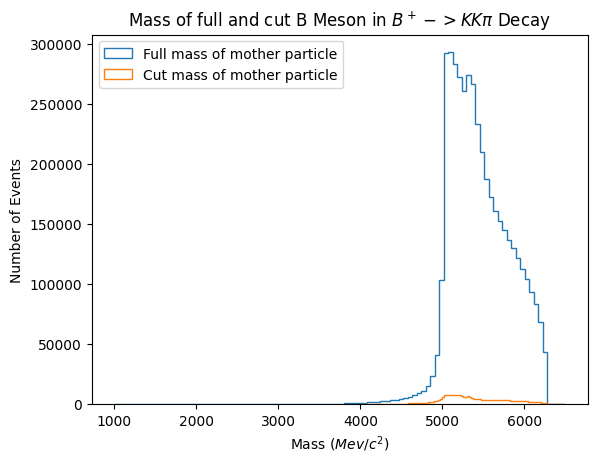

In [83]:
#Superimposing the mass plots of the full and cut masses of the B+ -> KKpi decay
plt.hist(mass_mother_Full_plusKKP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_plusKKP,100, range = [4000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^+ ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

plt.legend(loc = "upper left")

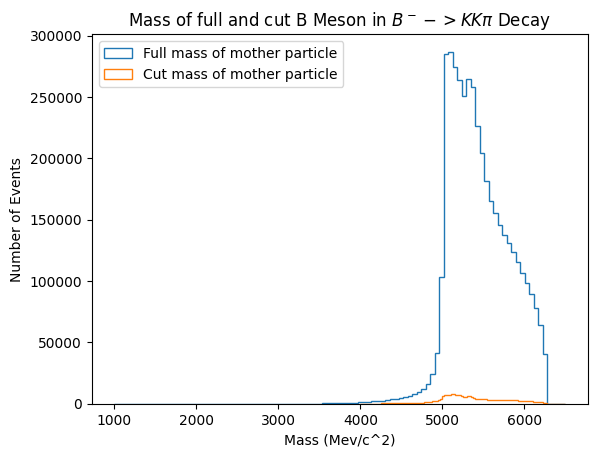

In [84]:
#Superimposing the mass plots of the full and cut masses of the B- -> KKpi decay
plt.hist(mass_mother_Full_minusKKP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_minusKKP,100, range = [4000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^- ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.legend(loc = "upper left")

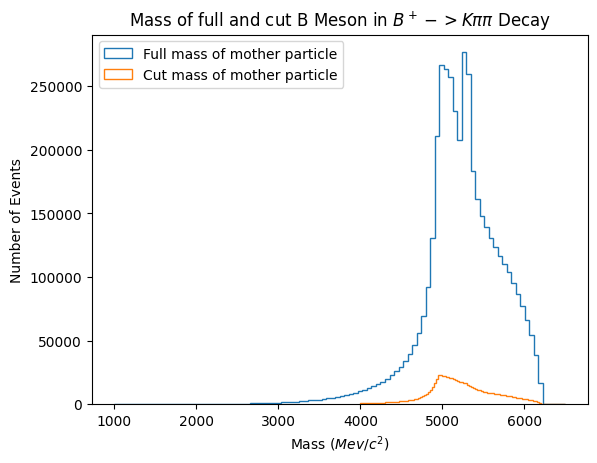

In [85]:
#Superimposing the mass plots of the full and cut masses of the B+ -> Kpipi decay
plt.hist(mass_mother_Full_plusKPP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of full and cut B Meson in B+ ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_plusKPP,100, range = [4000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^+ ->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

plt.legend(loc = "upper left")

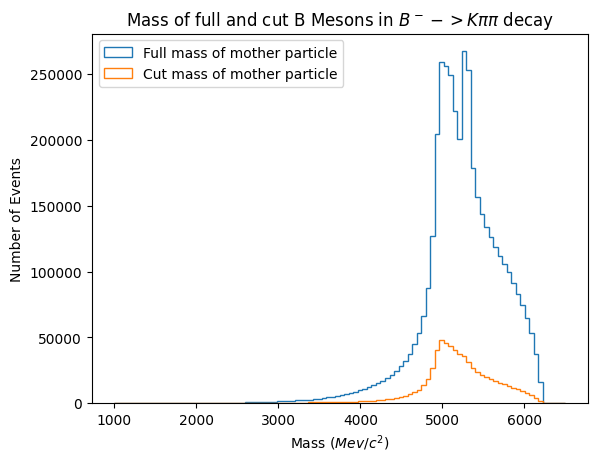

In [86]:
#Superimposing the mass plots of the full and cut masses of the B- -> Kpipi decay
plt.hist(mass_mother_Full_minusKPP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of full and cut B Mesons in B- -> Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_minusKPP,100, range = [1000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Mesons in $B^- -> K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

plt.legend(loc = "upper left")

# Selection Efficiencies

B- KKPi Decay

Text(0.5, 0, 'Mass ($Mev/c^2$)')

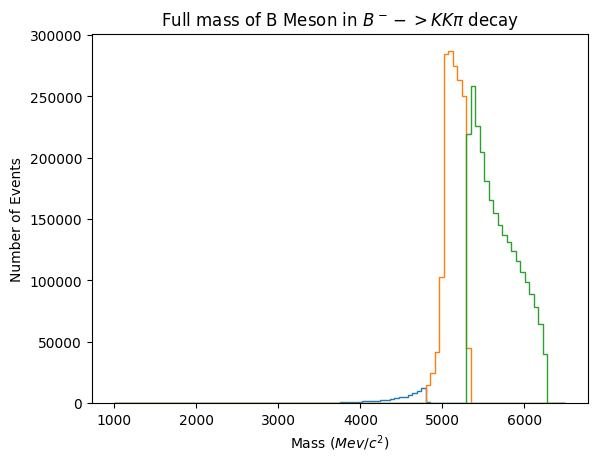

In [87]:
#Sectioning the full mass of B- -> KKpi

A_ONE_fullKKPminus = []
A_TWO_fullKKPminus = []
A_THREE_fullKKPminus = []

for tinkerbell in mass_mother_Full_minusKKP:
  if tinkerbell > 0 and tinkerbell <= 4800:
    A_ONE_fullKKPminus.append(tinkerbell)
  elif tinkerbell > 4800 and tinkerbell <=5300:
    A_TWO_fullKKPminus.append(tinkerbell)
  else:
    A_THREE_fullKKPminus.append(tinkerbell)

#Plotting each section together
plt.hist(A_ONE_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^- ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

Text(0.5, 0, 'Mass ($Mev/c^2$)')

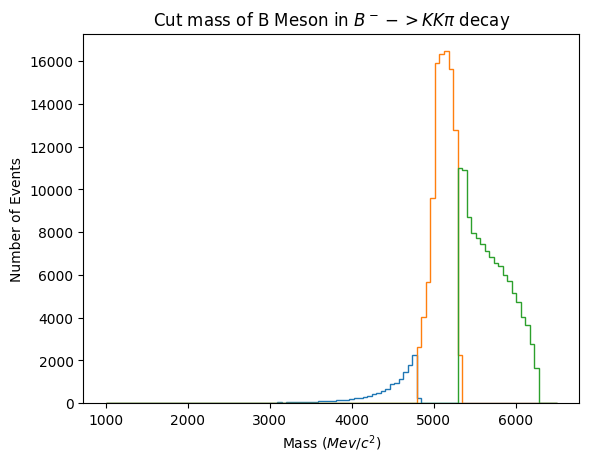

In [88]:
#Sectioning the cut mass of B- -> KKpi

A_ONE_cutKKPminus = []
A_TWO_cutKKPminus = []
A_THREE_cutKKPminus = []

for pickachu in mass_mother_Cut_minusKKP:
  if pickachu > 0 and pickachu <= 4800:
    A_ONE_cutKKPminus.append(pickachu)
  elif pickachu > 4800 and pickachu <=5300:
    A_TWO_cutKKPminus.append(pickachu)
  else:
    A_THREE_cutKKPminus.append(pickachu)

#Plotting each section together
plt.hist(A_ONE_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [89]:
#Calculating the selection efficiencies for the B- -> KKpi

sel_eff_KKPBminus_one = len(A_ONE_cutKKPminus)/float(len(A_ONE_fullKKPminus))
print("The selection efficiency for the left tail of the B- -> KKpi is: " + str(sel_eff_KKPBminus_one))

sel_eff_KKPBminus_two = len(A_TWO_cutKKPminus)/float(len(A_TWO_fullKKPminus))
print("The selection efficiency for the peak of the B- -> KKpi is: " + str(sel_eff_KKPBminus_two))

sel_eff_KKPBminus_three = len(A_THREE_cutKKPminus)/float(len(A_THREE_fullKKPminus))
print("The selection efficiency for the right tail of the B- -> KKpi is: " + str(sel_eff_KKPBminus_three))


#Calculating the percentage of each B- -> KKpi
perc_KKPBminus_one = len(A_ONE_cutKKPminus)/len(mass_mother_Cut_minusKKP)
print("The percentage for the left tail of the B- -> KKpi is: " + str(perc_KKPBminus_one))

perc_KKPBminus_two = len(A_TWO_cutKKPminus)/len(mass_mother_Cut_minusKKP)
print("The percentage for the peak tail of the B- -> KKpi is: " + str(perc_KKPBminus_two))

perc_KKPBminus_three = len(A_THREE_cutKKPminus)/len(mass_mother_Cut_minusKKP)
print("The percentage for the right tail of the B- -> KKpi is: " + str(perc_KKPBminus_three))

#Full eficiency

Sel_eff_KKPBminus = sel_eff_KKPBminus_one*perc_KKPBminus_one+sel_eff_KKPBminus_two*perc_KKPBminus_two+sel_eff_KKPBminus_three*perc_KKPBminus_three
print("The selection efficiency for B- -> KKpi is: " + str(Sel_eff_KKPBminus))

The selection efficiency for the left tail of the B- -> KKpi is: 0.18492703114789807
The selection efficiency for the peak of the B- -> KKpi is: 0.06373080454276767
The selection efficiency for the right tail of the B- -> KKpi is: 0.04499405353666055
The percentage for the left tail of the B- -> KKpi is: 0.059241685492241535
The percentage for the peak tail of the B- -> KKpi is: 0.44198379401477556
The percentage for the right tail of the B- -> KKpi is: 0.49877452049298293
The selection efficiency for B- -> KKpi is: 0.061565259283487744


B+ KKPi Decay

Text(0.5, 0, 'Mass ($Mev/c^2$)')

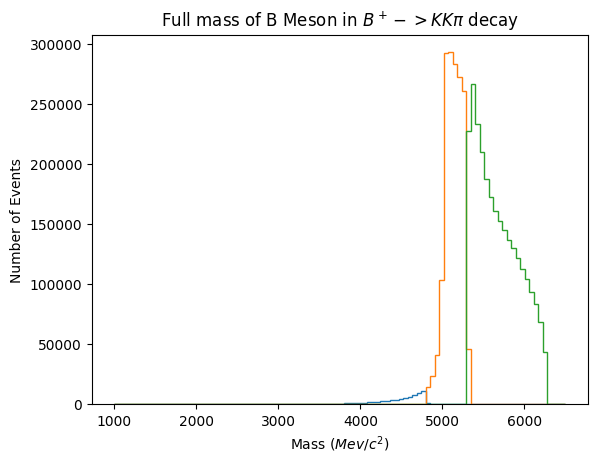

In [90]:
#Sectioning the full mass of B+ -> KKpi

A_ONE_fullKKPplus = []
A_TWO_fullKKPplus = []
A_THREE_fullKKPplus = []

for poohbear in mass_mother_Full_plusKKP:
  if poohbear > 0 and poohbear <= 4800:
    A_ONE_fullKKPplus.append(poohbear)
  elif poohbear > 4800 and poohbear <=5300:
    A_TWO_fullKKPplus.append(poohbear)
  else:
    A_THREE_fullKKPplus.append(poohbear)

#Plotting each section together
plt.hist(A_ONE_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^+ ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

Text(0.5, 0, 'Mass ($Mev/c^2$)')

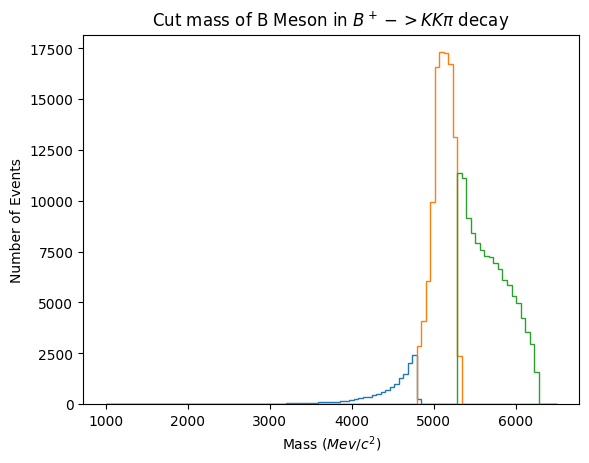

In [91]:
#Sectioning the cut mass of B+ -> KKpi

A_ONE_cutKKPplus = []
A_TWO_cutKKPplus = []
A_THREE_cutKKPplus = []

for arvo in mass_mother_Cut_plusKKP:
  if arvo > 0 and arvo <= 4800:
    A_ONE_cutKKPplus.append(arvo)
  elif arvo > 4800 and arvo <=5300:
    A_TWO_cutKKPplus.append(arvo)
  else:
    A_THREE_cutKKPplus.append(arvo)

#Plotting each section together
plt.hist(A_ONE_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+ ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [92]:
#Calculating the selection efficiencies for the B+ -> KKpi

sel_eff_KKPBplus_one = len(A_ONE_cutKKPplus)/float(len(A_ONE_fullKKPplus))
print("The selection efficiency for the left tail of the B+ -> KKpi is: " + str(sel_eff_KKPBplus_one))

sel_eff_KKPBplus_two = len(A_TWO_cutKKPplus)/float(len(A_TWO_fullKKPplus))
print("The selection efficiency for the peak of the B+ -> KKpi is: " + str(sel_eff_KKPBplus_two))

sel_eff_KKPBplus_three = len(A_THREE_cutKKPplus)/float(len(A_THREE_fullKKPplus))
print("The selection efficiency for the right tail of the B+ -> KKpi is: " + str(sel_eff_KKPBplus_three))

#Calculating the percentage of each B+ -> KKpi
perc_KKPBplus_one = len(A_ONE_cutKKPplus)/len(mass_mother_Cut_plusKKP)
print("The percentage for the left tail of the B+ -> KKpi is: " + str(perc_KKPBplus_one))

perc_KKPBplus_two = len(A_TWO_cutKKPplus)/len(mass_mother_Cut_plusKKP)
print("The percentage for the peak tail of the B+ -> KKpi is: " + str(perc_KKPBplus_two))

perc_KKPBplus_three = len(A_THREE_cutKKPplus)/len(mass_mother_Cut_plusKKP)
print("The percentage for the right tail of the B+ -> KKpi is: " + str(perc_KKPBplus_three))

#Full eficiency

Sel_eff_KKPBplus = sel_eff_KKPBplus_one*perc_KKPBplus_one+sel_eff_KKPBplus_two*perc_KKPBplus_two+sel_eff_KKPBplus_three*perc_KKPBplus_three
print("The selection efficiency for B+ -> KKpi is: " + str(Sel_eff_KKPBplus))

The selection efficiency for the left tail of the B+ -> KKpi is: 0.2114293275309477
The selection efficiency for the peak of the B+ -> KKpi is: 0.06512486576868573
The selection efficiency for the right tail of the B+ -> KKpi is: 0.04460546987720029
The percentage for the left tail of the B+ -> KKpi is: 0.060200514892102895
The percentage for the peak tail of the B+ -> KKpi is: 0.4447830546078657
The percentage for the right tail of the B+ -> KKpi is: 0.4950164305000314
The selection efficiency for B+ -> KKpi is: 0.06377503158756576


B- KPiPi Decay

Text(0.5, 0, 'Mass ($Mev/c^2$)')

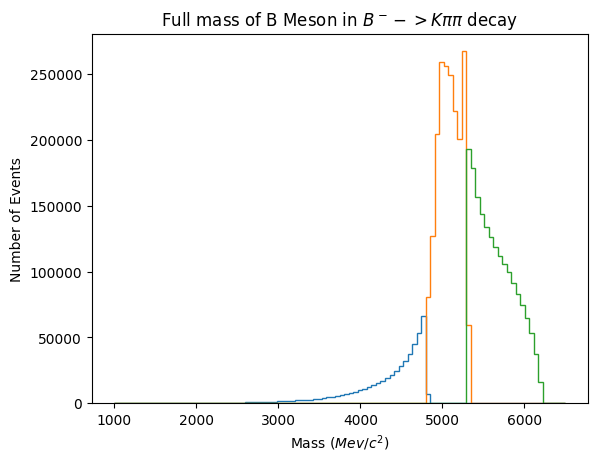

In [93]:
#sectioning the full mass of the B- -> Kpipi
A_ONE_fullKPPminus = []
A_TWO_fullKPPminus = []
A_THREE_fullKPPminus = []

for venti in mass_mother_Full_minusKPP:
  if venti > 0 and venti <= 4800:
    A_ONE_fullKPPminus.append(venti)
  elif venti > 4800 and venti <=5300:
    A_TWO_fullKPPminus.append(venti)
  else:
    A_THREE_fullKPPminus.append(venti)

#Plotting each section together
plt.hist(A_ONE_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

The selection efficiency for the left tail of the B- -> Kpipi is: 0.16816072483106279
The selection efficiency for the peak of the B- -> Kpipi is: 0.176507924974829
The selection efficiency for the right tail of the B- -> Kpipi is: 0.13680169002749648
0.1233482619278871
0.509759044090315
0.3668926939817979
the full sel efficiency is: 0.1609103848374302


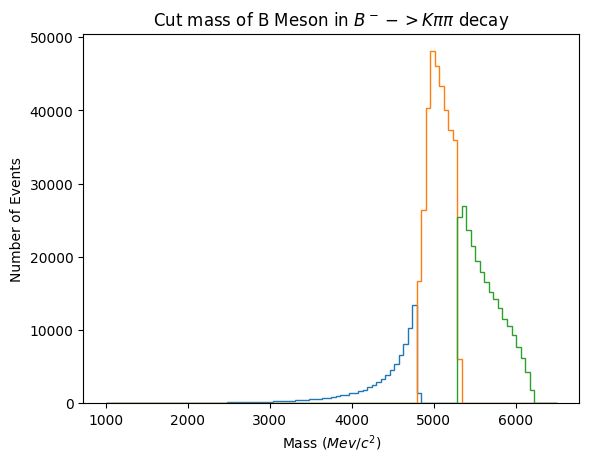

In [94]:
#Sectioning the cut mass of B- -> Kpipi

A_ONE_cutKPPminus = []
A_TWO_cutKPPminus = []
A_THREE_cutKPPminus = []

for grande in mass_mother_Cut_minusKPP:
  if grande > 0 and grande <= 4800:
    A_ONE_cutKPPminus.append(grande)
  elif grande > 4800 and grande <=5300:
    A_TWO_cutKPPminus.append(grande)
  else:
    A_THREE_cutKPPminus.append(grande)

#Plotting each section together
plt.hist(A_ONE_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

#Calculating the selection efficiencies for the B- -> Kpipi

sel_eff_KPPBminus_one = len(A_ONE_cutKPPminus)/float(len(A_ONE_fullKPPminus))
print("The selection efficiency for the left tail of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_one))

sel_eff_KPPBminus_two = len(A_TWO_cutKPPminus)/float(len(A_TWO_fullKPPminus))
print("The selection efficiency for the peak of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_two))

sel_eff_KPPBminus_three = len(A_THREE_cutKPPminus)/float(len(A_THREE_fullKPPminus))
print("The selection efficiency for the right tail of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_three))

#Calculating full selection efficiency
percent_rightminus = len(A_ONE_cutKPPminus)/float(len(mass_mother_Cut_minusKPP))
percent_peakminus = len(A_TWO_cutKPPminus)/float(len(mass_mother_Cut_minusKPP))
percent_leftminus = len(A_THREE_cutKPPminus)/float(len(mass_mother_Cut_minusKPP))

print(percent_rightminus)
print(percent_peakminus)
print(percent_leftminus)

full_sel_effKPPminus = (sel_eff_KPPBminus_one*percent_rightminus)+(sel_eff_KPPBminus_two*percent_peakminus)+(sel_eff_KPPBminus_three)*percent_leftminus
print("the full sel efficiency is: " + str(full_sel_effKPPminus))

B+ KPiPi Decay

Text(0.5, 0, 'Mass (Mev/c^2)')

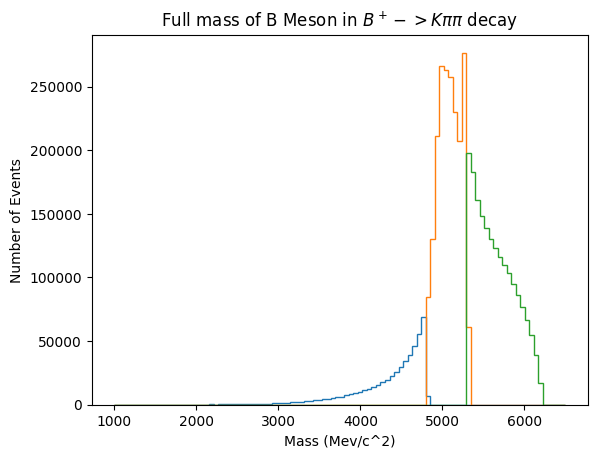

In [95]:
#Sectioning the full mass of B+ -> Kpipi
A_ONE_fullKPPplus = []
A_TWO_fullKPPplus = []
A_THREE_fullKPPplus = []

for mocha in mass_mother_Full_plusKPP:
  if mocha > 0 and mocha <= 4800:
    A_ONE_fullKPPplus.append(mocha)
  elif mocha > 4800 and mocha <=5300:
    A_TWO_fullKPPplus.append(mocha)
  else:
    A_THREE_fullKPPplus.append(mocha)

#Plotting each section together
plt.hist(A_ONE_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^+ ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

Text(0.5, 0, 'Mass (Mev/c^2)')

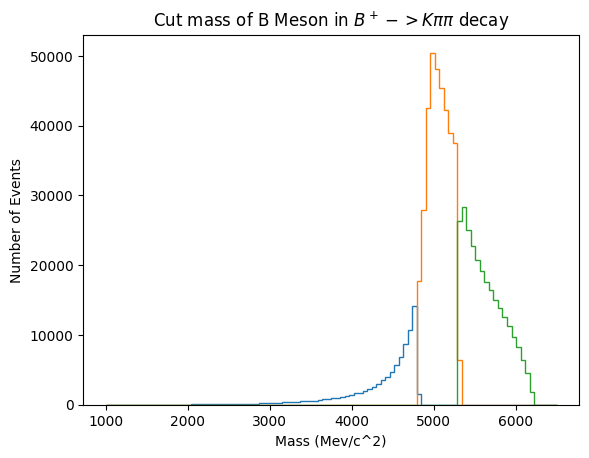

In [96]:
#Sectioning the cut mass of B+ -> Kpipi

A_ONE_cutKPPplus = []
A_TWO_cutKPPplus = []
A_THREE_cutKPPplus = []

for cappucino in mass_mother_Cut_plusKPP:
  if cappucino > 0 and cappucino <= 4800:
    A_ONE_cutKPPplus.append(cappucino)
  elif cappucino > 4800 and cappucino <=5300:
    A_TWO_cutKPPplus.append(cappucino)
  else:
    A_THREE_cutKPPplus.append(cappucino)

#Plotting each section together
plt.hist(A_ONE_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+ -> K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [97]:
#Calculating the selection efficiencies for the B+ -> Kpipi

sel_eff_KPPBplus_one = len(A_ONE_cutKPPplus)/float(len(A_ONE_fullKPPplus))
print("The selection efficiency for the left tail of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_one))

sel_eff_KPPBplus_two = len(A_TWO_cutKPPplus)/float(len(A_TWO_fullKPPplus))
print("The selection efficiency for the peak of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_two))

sel_eff_KPPBplus_three = len(A_THREE_cutKPPplus)/float(len(A_THREE_fullKPPplus))
print("The selection efficiency for the right tail of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_three))

#Calculating full selection efficiency
percent_rightplus = len(A_ONE_cutKPPplus)/float(len(mass_mother_Cut_plusKPP))
percent_peakplus = len(A_TWO_cutKPPplus)/float(len(mass_mother_Cut_plusKPP))
percent_leftplus = len(A_THREE_cutKPPplus)/float(len(mass_mother_Cut_plusKPP))

full_sel_effKPPplus = (sel_eff_KPPBplus_one*percent_rightplus)+(sel_eff_KPPBplus_two*percent_peakplus)+(sel_eff_KPPBplus_three)*percent_leftplus
print("the full sel efficiency is: " + str(full_sel_effKPPplus))

The selection efficiency for the left tail of the B+ -> Kpipi is: 0.16951183105791726
The selection efficiency for the peak of the B+ -> Kpipi is: 0.1796648118833482
The selection efficiency for the right tail of the B+ -> Kpipi is: 0.14059639217943148
the full sel efficiency is: 0.16399150447756


# Relative Branching Ratio

In [39]:
#Setting up the relative branching ratios for the B+ and B- decays
#Up
PID_eff_Up_KPPplus = 0.03991
PID_eff_Up_KKPplus = 0.01898
Trig_eff_Up_KPPplus = 0.03602
Trig_eff_Up_KKPplus = 0.01442
Sel_eff_Up_KPPplus = 0.16929844986787235
Sel_eff_Up_KKPplus = 0.055443458594972385

PID_eff_Up_KPPminus = 0.03973
PID_eff_Up_KKPminus = 0.01979
Trig_eff_Up_KPPminus = 0.03581
Trig_eff_Up_KKPminus = 0.01486
Sel_eff_Up_KPPminus = 0.16479221262196803
Sel_eff_Up_KKPminus = 0.05521149891061636

#Down
PID_eff_Down_KPPplus = 0.04113
PID_eff_Down_KKPplus = 0.0195
Trig_eff_Down_KPPplus = 0.03667
Trig_eff_Down_KKPplus = 0.01452
Sel_eff_Down_KPPplus = 0.16359295421093345
Sel_eff_Down_KKPplus = 0.06283840780726646


PID_eff_Down_KPPminus = 0.04092
PID_eff_Down_KKPminus = 0.02
Trig_eff_Down_KPPminus = 0.03645
Trig_eff_Down_KKPminus = 0.01498
Sel_eff_Down_KPPminus = 0.16105684156362396
Sel_eff_Down_KKPminus = 0.06225146717276958

#Combined
Down_len = len(Ptot_H1_Down)/(len(Ptot_H1_Down) + len(Ptot_H1_Up))
Up_len = len(Ptot_H1_Up)/(len(Ptot_H1_Up) + len(Ptot_H1_Down))
PID_eff_KPPplus = PID_eff_Down_KPPplus * Down_len + PID_eff_Up_KPPplus * Up_len
PID_eff_KKPplus = PID_eff_Down_KKPplus * Down_len + PID_eff_Up_KKPplus * Up_len
Trig_eff_KPPplus = Trig_eff_Down_KPPplus * Down_len + Trig_eff_Up_KPPplus * Up_len
Trig_eff_KKPplus = Trig_eff_Down_KKPplus * Down_len + Trig_eff_Up_KKPplus * Up_len
Sel_eff_KPPplus = Sel_eff_Down_KPPplus * Down_len + Sel_eff_Up_KPPplus * Up_len
Sel_eff_KKPplus = Sel_eff_Down_KKPplus * Down_len + Sel_eff_Up_KKPplus * Up_len

PID_eff_KPPminus = PID_eff_Down_KPPminus * Down_len + PID_eff_Up_KPPminus * Up_len
PID_eff_KKPminus = PID_eff_Down_KKPminus * Down_len + PID_eff_Up_KKPminus * Up_len
Trig_eff_KPPminus = Trig_eff_Down_KPPminus * Down_len + Trig_eff_Up_KPPminus * Up_len
Trig_eff_KKPminus = Trig_eff_Down_KKPminus * Down_len + Trig_eff_Up_KKPminus * Up_len
Sel_eff_KPPminus = Sel_eff_Down_KPPminus * Down_len + Sel_eff_Up_KPPminus * Up_len
Sel_eff_KKPminus = Sel_eff_Down_KKPminus * Down_len + Sel_eff_Up_KKPminus * Up_len

print("The PID efficiency of the B+ -> Kpipi decay is: " + str(PID_eff_KPPplus))
print("The PID efficiency of the B- -> Kpipi decay is: " + str(PID_eff_KPPminus))
print("The trigger efficiency of the B+ -> Kpipi decay is: " + str(Trig_eff_KPPplus))
print("The trigger efficiency of the B- -> Kpipi decay is: " + str(Trig_eff_KPPminus))
print("The selection efficiency of the B+ -> Kpipi decay is: " + str(Sel_eff_KPPplus))
print("The selection efficiency of the B- -> Kpipi decay is: " + str(Sel_eff_KPPminus))

print("The PID efficiency of the B+ -> KKpi decay is: " + str(PID_eff_KKPplus))
print("The PID efficiency of the B- -> KKpi decay is: " + str(PID_eff_KKPminus))
print("The trigger efficiency of the B+ -> KKpi decay is: " + str(Trig_eff_KKPplus))
print("The trigger efficiency of the B- -> KKpi decay is: " + str(Trig_eff_KKPminus))
print("The selection efficiency of the B+ -> KKpi decay is: " + str(Sel_eff_KKPplus))
print("The selection efficiency of the B- -> KKpi decay is: " + str(Sel_eff_KKPminus))



Rel_BRplus = ((Events_KPPplus)/float(Events_KKPplus))*((Trig_eff_KKPplus)/float(Trig_eff_KPPplus))*((PID_eff_KKPplus)/float(PID_eff_KPPplus))*((Sel_eff_KKPplus)/float(Sel_eff_KPPplus))
Rel_BRminus = ((Events_KPPminus)/float(Events_KKPminus))*((Trig_eff_KKPminus)/float(Trig_eff_KPPminus))*((PID_eff_KKPminus)/float(PID_eff_KPPminus))*((Sel_eff_KKPminus)/float(Sel_eff_KPPminus))

print("The relative branching ratio value of B+ ->Kpipi/B+ ->KKpi is: " + str(Rel_BRplus))
print("The relative branching ratio value of B- ->KPP/B- ->KKP is: " + str(Rel_BRminus))

The PID efficiency of the B+ -> Kpipi decay is: 0.040642306877955635
The PID efficiency of the B- -> Kpipi decay is: 0.0404442993317764
The trigger efficiency of the B+ -> Kpipi decay is: 0.03641016350055014
The trigger efficiency of the B- -> Kpipi decay is: 0.036194160985157056
The selection efficiency of the B+ -> Kpipi decay is: 0.16587371731728026
The selection efficiency of the B- -> Kpipi decay is: 0.16255005039431084
The PID efficiency of the B+ -> KKpi decay is: 0.019292130800440108
The PID efficiency of the B- -> KKpi decay is: 0.019916052823254655
The trigger efficiency of the B+ -> KKpi decay is: 0.01448002515393079
The trigger efficiency of the B- -> KKpi decay is: 0.014932030184716949
The selection efficiency of the B+ -> KKpi decay is: 0.05988228824275563
The selection efficiency of the B- -> KKpi decay is: 0.059437250696652566
The relative branching ratio value of B+ ->Kpipi/B+ ->KKpi is: 0.2035737671711503
The relative branching ratio value of B- ->KPP/B- ->KKP is: 0.2

# Dalitz Plots

<ipython-input-104-fb37eb845203>:19: RuntimeWarning: invalid value encountered in sqrt
  m1_plus = sqrt(E_H1TOT_Full_plusKKP**2 - Ptot_H1**2)
<ipython-input-104-fb37eb845203>:20: RuntimeWarning: invalid value encountered in sqrt
  m2_plus = sqrt(E_H2TOT_Full_plusKKP**2 - Ptot_H2**2)
<ipython-input-104-fb37eb845203>:21: RuntimeWarning: invalid value encountered in sqrt
  m3_plus = sqrt(E_H3TOT_Full_plusKKP**2 - Ptot_H3**2)


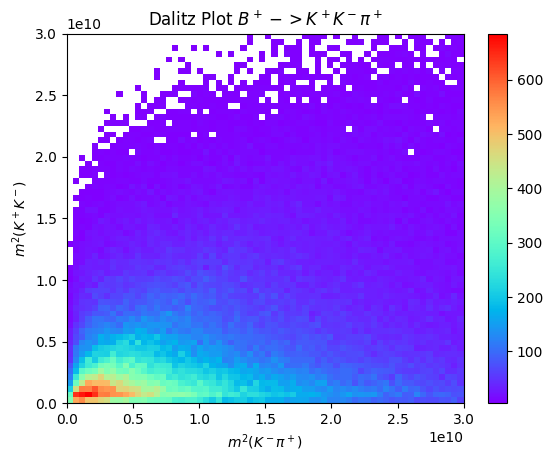

In [104]:
#Dalitz plotting

axlim = 30e9
nbin = 64
vbin = np.linspace(0, axlim, nbin + 1)

min_length = min(len(E_H1TOT_Full_plusKKP), len(Ptot_H1))
E_H1TOT_Full_plusKKP = np.tile(E_H1TOT_Full_plusKKP, min_length // len(E_H1TOT_Full_plusKKP) + 1)[:min_length]
Ptot_H1 = np.tile(Ptot_H1, min_length // len(Ptot_H1) + 1)[:min_length]

min_length = min(len(E_H2TOT_Full_plusKKP), len(Ptot_H2))
E_H2TOT_Full_plusKKP = np.tile(E_H2TOT_Full_plusKKP, min_length // len(E_H2TOT_Full_plusKKP) + 1)[:min_length]
Ptot_H2 = np.tile(Ptot_H2, min_length // len(Ptot_H2) + 1)[:min_length]

min_length = min(len(E_H3TOT_Full_plusKKP), len(Ptot_H3))
E_H3TOT_Full_plusKKP = np.tile(E_H3TOT_Full_plusKKP, min_length // len(E_H3TOT_Full_plusKKP) + 1)[:min_length]
Ptot_H3 = np.tile(Ptot_H3, min_length // len(Ptot_H3) + 1)[:min_length]

m1_plus = sqrt(E_H1TOT_Full_plusKKP**2 - Ptot_H1**2)
m2_plus = sqrt(E_H2TOT_Full_plusKKP**2 - Ptot_H2**2)
m3_plus = sqrt(E_H3TOT_Full_plusKKP**2 - Ptot_H3**2)


max_length = max(len(m1_plus), len(m2_plus), len(m3_plus))

m1_plus = np.tile(m1_plus, max_length // len(m1_plus) + 1)[:max_length]
m2_plus = np.tile(m2_plus, max_length // len(m2_plus) + 1)[:max_length]
m3_plus = np.tile(m3_plus, max_length // len(m3_plus) + 1)[:max_length]

m1m2_plus = (m1_plus + m2_plus)**2
m1m3_plus = (m1_plus + m3_plus)**2

cmap = plt.get_cmap("rainbow")
cmap.set_under("white")

plt.hist2d(m1m3_plus, m1m2_plus, bins = (vbin, vbin), cmap = cmap, vmin = 5)
plt.ylabel("$m^2  (K^+ K^-)$")
plt.xlabel("$m^2  (K^- \pi^+)$")
plt.title("Dalitz Plot $B^+ ->K^+K^-\pi^+$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

<ipython-input-105-a0acb5034134>:17: RuntimeWarning: invalid value encountered in sqrt
  m1_minus = np.sqrt(E_H1TOT_Full_minusKKP**2 - Ptot_H1**2)
<ipython-input-105-a0acb5034134>:18: RuntimeWarning: invalid value encountered in sqrt
  m2_minus = np.sqrt(E_H2TOT_Full_minusKKP**2 - Ptot_H2**2)
<ipython-input-105-a0acb5034134>:19: RuntimeWarning: invalid value encountered in sqrt
  m3_minus = np.sqrt(E_H3TOT_Full_minusKKP**2 - Ptot_H3**2)


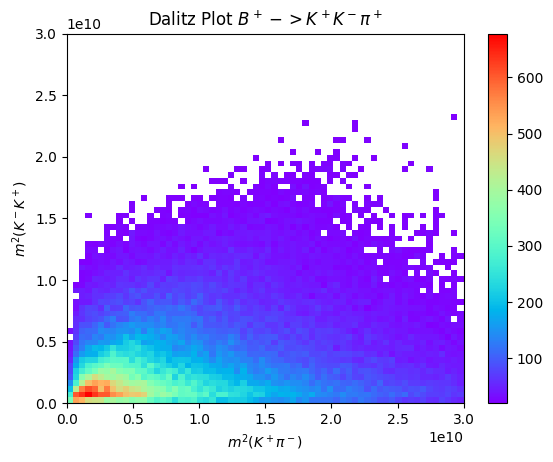

In [105]:
axlim = 30e9
nbin = 64
vbin = np.linspace(0, axlim, nbin + 1)

min_length = min(len(E_H1TOT_Full_minusKKP), len(Ptot_H1))
E_H1TOT_Full_minusKKP = np.tile(E_H1TOT_Full_minusKKP, min_length // len(E_H1TOT_Full_minusKKP) + 1)[:min_length]
Ptot_H1 = np.tile(Ptot_H1, min_length // len(Ptot_H1) + 1)[:min_length]

min_length = min(len(E_H2TOT_Full_minusKKP), len(Ptot_H2))
E_H2TOT_Full_minusKKP = np.tile(E_H2TOT_Full_minusKKP, min_length // len(E_H2TOT_Full_minusKKP) + 1)[:min_length]
Ptot_H2 = np.tile(Ptot_H2, min_length // len(Ptot_H2) + 1)[:min_length]

min_length = min(len(E_H3TOT_Full_minusKKP), len(Ptot_H3))
E_H3TOT_Full_minusKKP = np.tile(E_H3TOT_Full_minusKKP, min_length // len(E_H3TOT_Full_minusKKP) + 1)[:min_length]
Ptot_H3 = np.tile(Ptot_H3, min_length // len(Ptot_H3) + 1)[:min_length]

m1_minus = np.sqrt(E_H1TOT_Full_minusKKP**2 - Ptot_H1**2)
m2_minus = np.sqrt(E_H2TOT_Full_minusKKP**2 - Ptot_H2**2)
m3_minus = np.sqrt(E_H3TOT_Full_minusKKP**2 - Ptot_H3**2)

max_length = max(len(m1_minus), len(m2_minus), len(m3_minus))

m1_minus = np.tile(m1_minus, max_length // len(m1_minus) + 1)[:max_length]
m2_minus = np.tile(m2_minus, max_length // len(m2_minus) + 1)[:max_length]
m3_minus = np.tile(m3_minus, max_length // len(m3_minus) + 1)[:max_length]

m1m2_minus = (m1_minus + m2_minus)**2
m1m3_minus = (m1_minus + m3_minus)**2

cmap = plt.get_cmap("rainbow")
cmap.set_under("white")

plt.hist2d(m1m3_minus, m1m2_minus, bins=(vbin, vbin), cmap=cmap, vmin=20)
plt.ylabel("$m^2  (K^- K^+)$")
plt.xlabel("$m^2  (K^+ \pi^-)$")
plt.title("Dalitz Plot $B^+ ->K^+K^-\pi^+$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

<ipython-input-107-2e4f131a5500>:17: RuntimeWarning: invalid value encountered in sqrt
  m1_plus = np.sqrt(E_H1TOT_Full_plusKPP**2 - Ptot_H1**2)
<ipython-input-107-2e4f131a5500>:18: RuntimeWarning: invalid value encountered in sqrt
  m2_plus = np.sqrt(E_H2TOT_Full_plusKPP**2 - Ptot_H2**2)
<ipython-input-107-2e4f131a5500>:19: RuntimeWarning: invalid value encountered in sqrt
  m3_plus = np.sqrt(E_H3TOT_Full_plusKPP**2 - Ptot_H3**2)


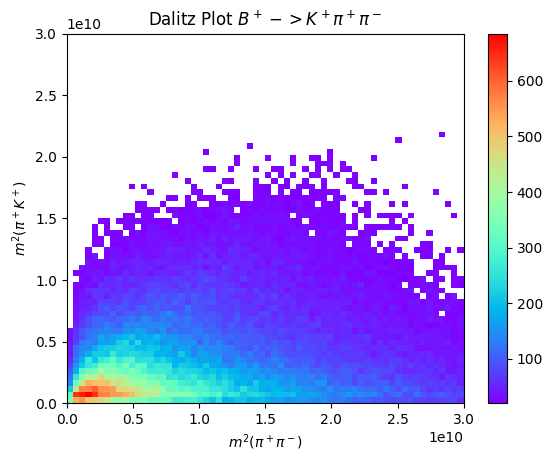

In [107]:
axlim = 30e9
nbin = 64
vbin = np.linspace(0, axlim, nbin + 1)

min_length = min(len(E_H1TOT_Full_plusKPP), len(Ptot_H1))
E_H1TOT_Full_plusKPP = np.tile(E_H1TOT_Full_plusKPP, min_length // len(E_H1TOT_Full_plusKPP) + 1)[:min_length]
Ptot_H1 = np.tile(Ptot_H1, min_length // len(Ptot_H1) + 1)[:min_length]

min_length = min(len(E_H2TOT_Full_plusKPP), len(Ptot_H2))
E_H2TOT_Full_plusKPP = np.tile(E_H2TOT_Full_plusKPP, min_length // len(E_H2TOT_Full_plusKPP) + 1)[:min_length]
Ptot_H2 = np.tile(Ptot_H2, min_length // len(Ptot_H2) + 1)[:min_length]

min_length = min(len(E_H3TOT_Full_plusKPP), len(Ptot_H3))
E_H3TOT_Full_plusKPP = np.tile(E_H3TOT_Full_plusKPP, min_length // len(E_H3TOT_Full_plusKPP) + 1)[:min_length]
Ptot_H3 = np.tile(Ptot_H3, min_length // len(Ptot_H3) + 1)[:min_length]

m1_plus = np.sqrt(E_H1TOT_Full_plusKPP**2 - Ptot_H1**2)
m2_plus = np.sqrt(E_H2TOT_Full_plusKPP**2 - Ptot_H2**2)
m3_plus = np.sqrt(E_H3TOT_Full_plusKPP**2 - Ptot_H3**2)

max_length = max(len(m1_plus), len(m2_plus), len(m3_plus))

m1_plus = np.tile(m1_plus, max_length // len(m1_plus) + 1)[:max_length]
m2_plus = np.tile(m2_plus, max_length // len(m2_plus) + 1)[:max_length]
m3_plus = np.tile(m3_plus, max_length // len(m3_plus) + 1)[:max_length]

m1m2_plus = (m1_plus + m2_plus)**2
m1m3_plus = (m1_plus + m3_plus)**2

cmap = plt.get_cmap("rainbow")
cmap.set_under("white")

plt.hist2d(m1m3_plus, m1m2_plus, bins=(vbin, vbin), cmap=cmap, vmin=20)
plt.ylabel("$m^2  (\pi^+ K^+)$")
plt.xlabel("$m^2  (\pi^+ \pi^-)$")
plt.title("Dalitz Plot $B^+ ->K^+\pi^+\pi^-$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()


<ipython-input-108-f85124416cb6>:17: RuntimeWarning: invalid value encountered in sqrt
  m1_minus = np.sqrt(E_H1TOT_Full_minusKPP**2 - Ptot_H1**2)
<ipython-input-108-f85124416cb6>:18: RuntimeWarning: invalid value encountered in sqrt
  m2_minus = np.sqrt(E_H2TOT_Full_minusKPP**2 - Ptot_H2**2)
<ipython-input-108-f85124416cb6>:19: RuntimeWarning: invalid value encountered in sqrt
  m3_minus = np.sqrt(E_H3TOT_Full_minusKPP**2 - Ptot_H3**2)


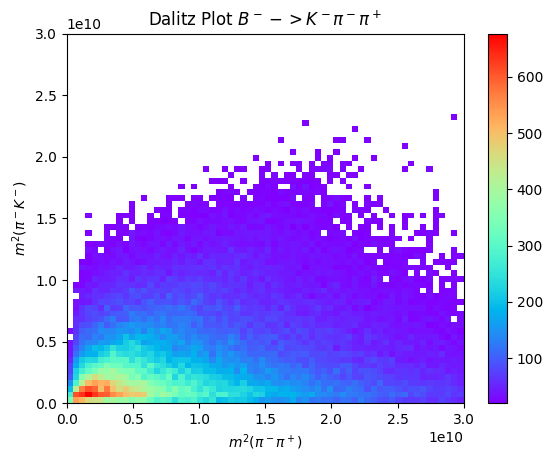

In [108]:
axlim = 30e9
nbin = 64
vbin = np.linspace(0, axlim, nbin + 1)

min_length = min(len(E_H1TOT_Full_minusKPP), len(Ptot_H1))
E_H1TOT_Full_minusKPP = np.tile(E_H1TOT_Full_minusKPP, min_length // len(E_H1TOT_Full_minusKPP) + 1)[:min_length]
Ptot_H1 = np.tile(Ptot_H1, min_length // len(Ptot_H1) + 1)[:min_length]

min_length = min(len(E_H2TOT_Full_minusKPP), len(Ptot_H2))
E_H2TOT_Full_minusKPP = np.tile(E_H2TOT_Full_minusKPP, min_length // len(E_H2TOT_Full_minusKPP) + 1)[:min_length]
Ptot_H2 = np.tile(Ptot_H2, min_length // len(Ptot_H2) + 1)[:min_length]

min_length = min(len(E_H3TOT_Full_minusKPP), len(Ptot_H3))
E_H3TOT_Full_minusKPP = np.tile(E_H3TOT_Full_minusKPP, min_length // len(E_H3TOT_Full_minusKPP) + 1)[:min_length]
Ptot_H3 = np.tile(Ptot_H3, min_length // len(Ptot_H3) + 1)[:min_length]

m1_minus = np.sqrt(E_H1TOT_Full_minusKPP**2 - Ptot_H1**2)
m2_minus = np.sqrt(E_H2TOT_Full_minusKPP**2 - Ptot_H2**2)
m3_minus = np.sqrt(E_H3TOT_Full_minusKPP**2 - Ptot_H3**2)

max_length = max(len(m1_minus), len(m2_minus), len(m3_minus))

m1_minus = np.tile(m1_minus, max_length // len(m1_minus) + 1)[:max_length]
m2_minus = np.tile(m2_minus, max_length // len(m2_minus) + 1)[:max_length]
m3_minus = np.tile(m3_minus, max_length // len(m3_minus) + 1)[:max_length]

m1m2_minus = (m1_minus + m2_minus)**2
m1m3_minus = (m1_minus + m3_minus)**2

cmap = plt.get_cmap("rainbow")
cmap.set_under("white")

plt.hist2d(m1m3_minus, m1m2_minus, bins=(vbin, vbin), cmap=cmap, vmin=20)
plt.ylabel("$m^2  (\pi^- K^-)$")
plt.xlabel("$m^2  (\pi^- \pi^+)$")
plt.title("Dalitz Plot $B^- ->K^-\pi^-\pi^+$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()


# Curve Fit

In [103]:
!pip install lmfit

In [46]:
mass_mother_finfin_plusKKP = []

for i in mass_mother_Cut_plusKKP:
  if 5500 > i > 5000:
    mass_mother_finfin_plusKKP.append(i)
print(len(mass_mother_finfin_plusKKP))
print(len(mass_mother_Cut_plusKKP))

125241
238885


In [47]:
from lmfit.models import GaussianModel, ExponentialModel, LorentzianModel
from scipy.optimize import curve_fit

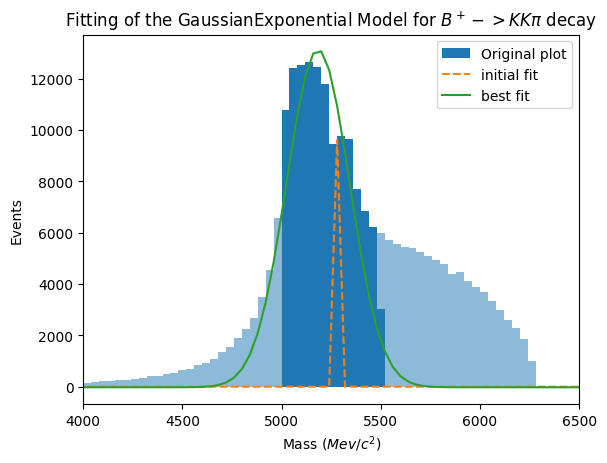

The yields are: 13152.877498962182


In [48]:
#GaussianExponential model fitting B+ -->KKpi
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import Model

# Define a custom model that combines Gaussian and Exponential components
def gaussian_exponential(x, amp_gauss, cen_gauss, sigma_gauss, amp_exp, decay_exp):
    gauss = amp_gauss * np.exp(-(x - cen_gauss)**2 / (2 * sigma_gauss**2))#(amp_gauss * np.exp(-(x-cen_gauss)/sigma_gauss))
    exp = (amp_exp * np.exp((-decay_exp)*x))
    return gauss + exp

# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_finfin_plusKKP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(x = mass[:-1], amp_gauss=9600, cen_gauss=5280, sigma_gauss=3.7, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
out = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_plusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
#plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")
plt.plot(mass[:-1], out.init_fit, '--', label='initial fit')
plt.plot(mass[:-1], out.best_fit, '-', label='best fit')

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(out.params['amp_gauss'].value))
fitted_yield_KKPplusGE = out.params['amp_gauss'].value

In [49]:
#B- --> KKpi
mass_mother_finfin_minusKKP = []

for i in mass_mother_Cut_minusKKP:
  if 5500 > i > 5000:
    mass_mother_finfin_minusKKP.append(i)
print(len(mass_mother_finfin_minusKKP))
print(len(mass_mother_Cut_minusKKP))

119882
229298


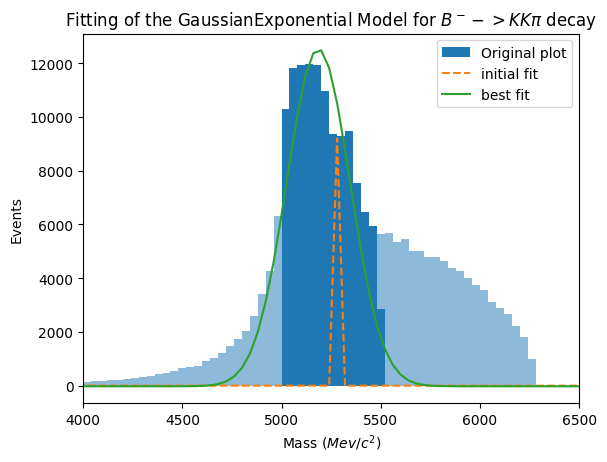

The yields are: 12556.024208488148
104.75352134213429


In [50]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_finfin_minusKKP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(x = mass[:-1], amp_gauss=9200, cen_gauss=5280, sigma_gauss=3.7, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
out = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_minusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
#plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")
plt.plot(mass[:-1], out.init_fit, '--', label='initial fit')
plt.plot(mass[:-1], out.best_fit, '-', label='best fit')

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^- ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(out.params['amp_gauss'].value))
fitted_yield_KKPminusGE = out.params['amp_gauss'].value

perc = (100*fitted_yield_KKPplusGE)/fitted_yield_KKPminusGE
print(perc)

In [51]:
#B+ --> Kpipi
mass_mother_finfin_plusKPP = []

for i in mass_mother_Cut_plusKPP:
  if 5400 > i > 4900:
    mass_mother_finfin_plusKPP.append(i)
print(len(mass_mother_finfin_plusKPP))
print(len(mass_mother_Cut_plusKPP))

369411
704215


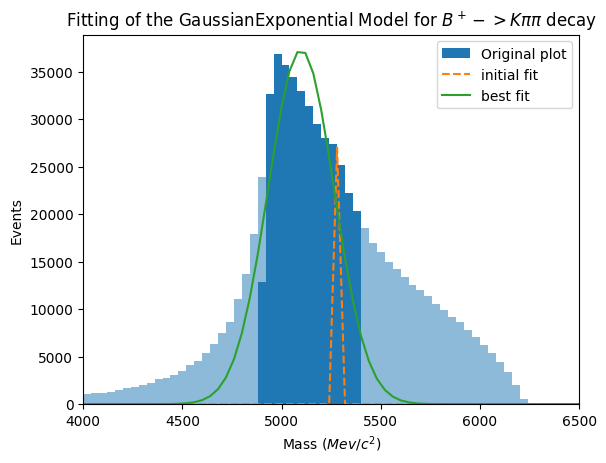

The yields are: 37270.975479430366


In [52]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_finfin_plusKPP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(x = mass[:-1], amp_gauss=27000, cen_gauss=5280, sigma_gauss=8.2, amp_exp=300, decay_exp=0.1)

# Fitting the data to the GaussianExponential model using the parameters
out = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_plusKPP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
#plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")
plt.plot(mass[:-1], out.init_fit, '--', label='initial fit')
plt.plot(mass[:-1], out.best_fit, '-', label='best fit')

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->K\pi\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(out.params['amp_gauss'].value))
fitted_yield_KPPplusGE = out.params['amp_gauss'].value

In [53]:
#B- --> Kpipi
mass_mother_finfin_minusKPP = []

for i in mass_mother_Cut_minusKPP:
  if 5400 > i > 4900:
    mass_mother_finfin_minusKPP.append(i)
print(len(mass_mother_finfin_minusKPP))
print(len(mass_mother_Cut_minusKPP))

352329
667176


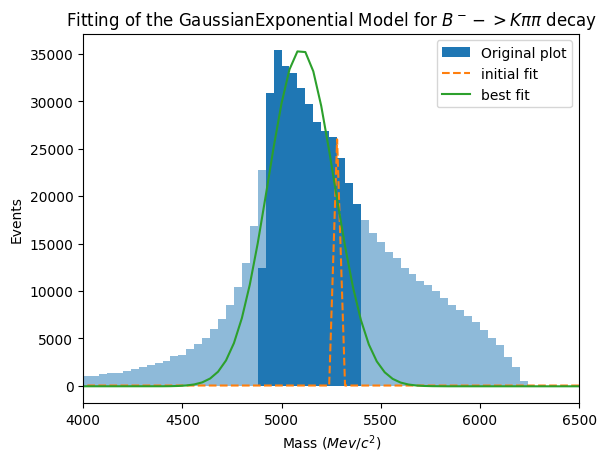

The yields are: 35588.49212887854
104.72760504844925


In [54]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_finfin_minusKPP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(x = mass[:-1], amp_gauss=26000, cen_gauss=5280, sigma_gauss=9.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
out = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_minusKPP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
#plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")
plt.plot(mass[:-1], out.init_fit, '--', label='initial fit')
plt.plot(mass[:-1], out.best_fit, '-', label='best fit')

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^- ->K\pi\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(out.params['amp_gauss'].value))
fitted_yield_KPPminusGE = out.params['amp_gauss'].value

perc = (100 * fitted_yield_KPPplusGE)/fitted_yield_KPPminusGE
print(perc)


# Asymmetry Calculation

In [55]:
#Asymmetry B -> Kpipi

Final_yieldKPPplus = fitted_yield_KPPplusGE*(1/float(PID_eff_KPPplus))*(1/float(Trig_eff_KPPplus))*(1/float(Sel_eff_KPPplus))
Final_yieldKPPminus = fitted_yield_KPPminusGE*(1/float(PID_eff_KPPminus))*(1/float(Trig_eff_KPPminus))*(1/float(Sel_eff_KPPminus))

Asymmetry_Kpipi = (Final_yieldKPPminus - Final_yieldKPPplus)/float(Final_yieldKPPminus + Final_yieldKPPplus)

print("The Asymmetry Value for The B -> Kpipi decay is: " + str(Asymmetry_Kpipi))

The Asymmetry Value for The B -> Kpipi decay is: -0.00755872801833872


In [56]:
#Asymmetry B -> KKpi

Final_yieldKKPplus = fitted_yield_KKPplusGE*(1/float(PID_eff_KKPplus))*(1/float(Trig_eff_KKPplus))*(1/float(Sel_eff_KKPplus))
Final_yieldKKPminus = fitted_yield_KKPminusGE*(1/float(PID_eff_KKPminus))*(1/float(Trig_eff_KKPminus))*(1/float(Sel_eff_KKPminus))

Asymmetry_KKpi = (Final_yieldKKPminus - Final_yieldKKPplus)/float(Final_yieldKKPminus + Final_yieldKKPplus)

print("The Asymmetry Value for The B -> KKpi decay is: " + str(Asymmetry_KKpi))

The Asymmetry Value for The B -> KKpi decay is: -0.050730223387662574
